<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1744]:
data = pd.read_csv('pokemon.csv', encoding='UTF-8')
data.head()

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


In [1745]:
data.columns

Index(['Pokémon', 'Tipo', 'PS', 'Ataque', 'Defensa', 'Ataque especial',
       'Defensa especial', 'Velocidad'],
      dtype='object')

In [1746]:
data.isnull().values.any() # Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

False

In [1747]:
data = data.drop(['Pokémon','Tipo'], axis=1)
data

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,2,3,2,4,2,4
1,2,3,2,2,2,3
2,2,3,4,3,2,1
3,3,5,3,4,3,4
4,2,3,3,4,2,4
5,3,4,3,5,3,4
6,3,2,2,4,3,3
7,3,2,2,2,2,2
8,2,4,4,2,2,3
9,3,3,2,3,2,2


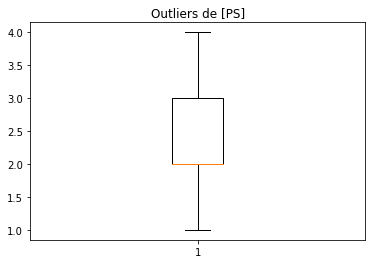

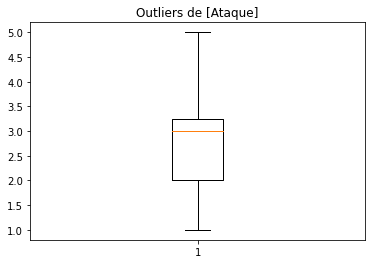

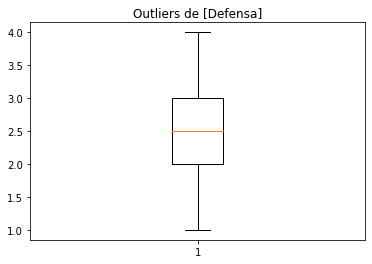

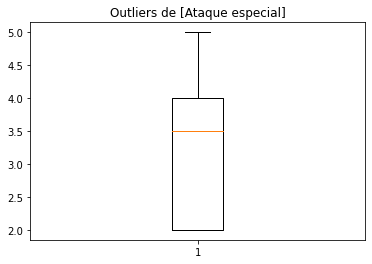

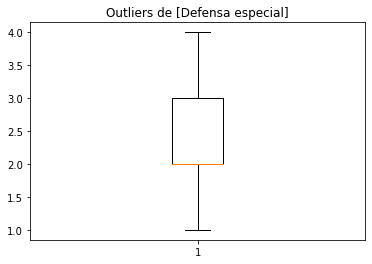

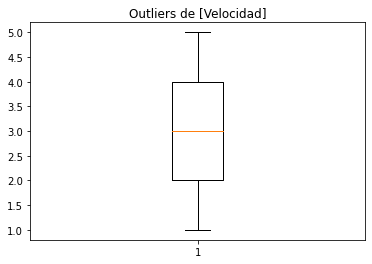

In [1748]:
for i in data.columns:
  arr = data[i]
  plt.boxplot(arr)
  plt.title("Outliers de [{0}]".format(i))
  plt.show()
     

In [1749]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
data.mean(axis=0)

----------------------
Media de cada variable
----------------------


PS                  2.25
Ataque              2.95
Defensa             2.60
Ataque especial     3.35
Defensa especial    2.40
Velocidad           2.85
dtype: float64

In [1750]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
data.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


PS                  0.618421
Ataque              0.892105
Defensa             0.673684
Ataque especial     1.397368
Defensa especial    0.673684
Velocidad           1.292105
dtype: float64

In [1751]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_transformed = ss.fit_transform(data)
data_transformed = pd.DataFrame(data = data_transformed, 
                        columns = ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"])
data_transformed


,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


Primero  obtenemos  la  matriz  de  covarianza  mediante  el  método  cov  de 
numpy

In [1752]:
data_cov=data_transformed.cov()
data_cov

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
PS,1.052632,0.466179,0.085833,0.491676,0.429163,0.232414
Ataque,0.466179,1.052632,0.543125,0.166228,0.385905,0.250269
Defensa,0.085833,0.543125,1.052632,0.102781,0.509868,-0.249399
Ataque especial,0.491676,0.166228,0.102781,1.052632,0.411123,0.496827
Defensa especial,0.429163,0.385905,0.509868,0.411123,1.052632,0.190018
Velocidad,0.232414,0.250269,-0.249399,0.496827,0.190018,1.052632


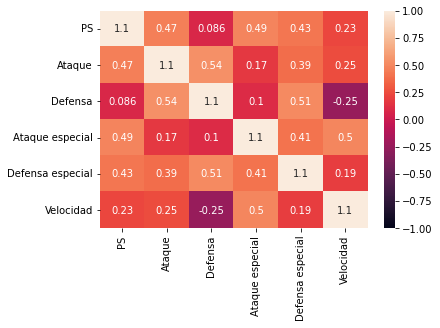

In [1753]:
import seaborn as sns

sns.heatmap(data_transformed.cov(),vmin=-1, vmax=1, annot=True);

In [1754]:

data_corr=data_transformed.corr()
data_corr

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
PS,1.000000,0.442870,0.081541,0.467092,0.407705,0.220794
Ataque,0.442870,1.000000,0.515969,0.157917,0.366610,0.237756
Defensa,0.081541,0.515969,1.000000,0.097642,0.484375,-0.236929
Ataque especial,0.467092,0.157917,0.097642,1.000000,0.390567,0.471986
Defensa especial,0.407705,0.366610,0.484375,0.390567,1.000000,0.180517
Velocidad,0.220794,0.237756,-0.236929,0.471986,0.180517,1.000000


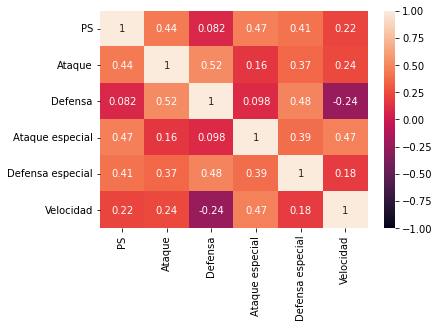

In [1755]:
import seaborn as sns
sns.heatmap(data_transformed.corr(),vmin=-1, vmax=1, annot=True); 

A partir de los datos anteriores, obtener los autovalores (eigenvalues) y los 
autovectores (eigenvectors). Para eso aplicamos a dicha matriz (data) el método linalg.eig también de numpy

In [1756]:
Autovalores, Autovectores = np.linalg.eig(data_corr)
print("Autovalores: ", Autovalores)
print("Autovectores: ", Autovectores)


Autovalores:  [2.49848047 1.4731284  0.15599543 0.45086785 0.67974537 0.74178248]
Autovectores:  [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]]


In [1757]:
Autovalores_Ordenados=np.sort(Autovalores)#, ascending=False)
print("Autovalores ordenados: ", Autovalores_Ordenados)

Autovalores ordenados:  [0.15599543 0.45086785 0.67974537 0.74178248 1.4731284  2.49848047]


Obten un DataFrame con el 
porcentaje de varianza y el acumulado por cada componente. 

In [1758]:
Porcentaje_De_Varianza=(Autovalores_Ordenados*100)/len(Autovalores_Ordenados)
print(Porcentaje_De_Varianza)
i=1
Porcentaje_Acumulado=0

for i in range(len(Porcentaje_De_Varianza)):
  Porcentaje_Acumulado=Porcentaje_Acumulado+Porcentaje_De_Varianza[i]
  print(Porcentaje_Acumulado, end=" ")
  #Porc_Def=np.array(Porcentaje_Acumulado)



[ 2.59992386  7.51446419 11.32908958 12.36304127 24.55213995 41.64134115]
2.599923855910314 10.11438804626266 21.443477624268315 33.8065188972089 58.358658848610816 100.00000000000003 

¿Cuánto 
información perdemos con 2 componentes?

33.81% (100-66.19)%

¿Cuánta información representamos con 3 componentes? 

68.79%

Representar gráficamente los individuos de nuestro dataset, pero usando los 
valores  de  las  componentes  principales  obtenidas.   (PCA)


In [1759]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(df)

PCA(n_components=5)

In [1760]:
#pca.components_
componentes = pd.DataFrame(pca.components_)
componentes

#columns=['PC%s' % _ for _ in range(len(componentes.columns))])
#index=data.columns


,0,1,2,3,4,5,6,7,8,9
0,-0.020890,-0.050089,-0.574436,-0.140803,0.049476,-0.315679,-0.018699,-0.736071,0.017288,0.051991
1,-0.232605,-0.078779,0.127133,-0.010313,0.058700,-0.793812,0.168357,0.282855,0.307949,0.294369
2,0.349696,0.150273,0.091686,0.231427,-0.542077,-0.334766,0.143253,-0.041243,-0.599474,0.075225
3,0.287142,-0.318419,-0.327236,0.427808,-0.047077,0.005707,-0.596879,0.222170,0.124465,0.320454
4,0.415618,-0.201744,0.294707,0.126832,0.702041,-0.240287,-0.044175,-0.123338,-0.246282,-0.234956


Obtén  un  diagrama  de  dispersión  en  2  dimensiones  y 
comenta que  has interpretado en él. 

Es  necesario que  el diagrama contenga toda la información necesaria. 

Habrá que interpretar que información proporciona el eje X y el eje Y. 

EJE X ---> COMPONENTES

EJE Y ---> VARIANZA EXPLICADA

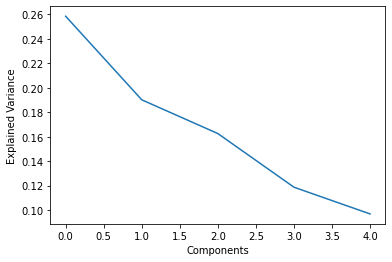

In [1761]:
import matplotlib.pyplot as plot

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

Por último, elegir al menos 4 individuos 
y explicar qué pasa con ellos. 